<a href="https://colab.research.google.com/github/muskanalirizvi/Algorithms/blob/main/DecisionTreeProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('nearest-earth-objects(1910-2024).csv')
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [ ]:
df.shape

(338199, 9)

In [ ]:
df.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [ ]:
df = df.drop(['neo_id', 'name','orbiting_body'], axis = 1)

In [ ]:
df.columns

Index(['absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'relative_velocity', 'miss_distance',
       'is_hazardous'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
df[['absolute_magnitude', 'estimated_diameter_min','estimated_diameter_max']] = imputer.fit_transform(df[['absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max']])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338199 non-null  float64
 1   estimated_diameter_min  338199 non-null  float64
 2   estimated_diameter_max  338199 non-null  float64
 3   relative_velocity       338199 non-null  float64
 4   miss_distance           338199 non-null  float64
 5   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 13.2 MB


In [ ]:
columns = ['absolute_magnitude', 'estimated_diameter_min','estimated_diameter_max', 'relative_velocity', 'miss_distance']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])

In [ ]:
df[columns] = df[columns].astype('float16')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338199 non-null  float16
 1   estimated_diameter_min  338199 non-null  float16
 2   estimated_diameter_max  338199 non-null  float16
 3   relative_velocity       338199 non-null  float16
 4   miss_distance           338199 non-null  float16
 5   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float16(5)
memory usage: 3.5 MB


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['is_hazardous'], axis = 1), df['is_hazardous'], test_size = 0.2)

In [ ]:
 from sklearn.tree import DecisionTreeClassifier

 model = DecisionTreeClassifier(max_depth = 20, criterion = 'gini')
 model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=20)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.8888083973979893

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[57012,  1943],
       [ 5578,  3107]])

In [ ]:
for importance, name in sorted(zip(model.feature_importances_, x_train.columns),reverse=True):
  print (name, importance)

absolute_magnitude 0.421167581371066
miss_distance 0.24249889697202093
relative_velocity 0.19921970120590735
estimated_diameter_min 0.0688388612806137
estimated_diameter_max 0.06827495917039207


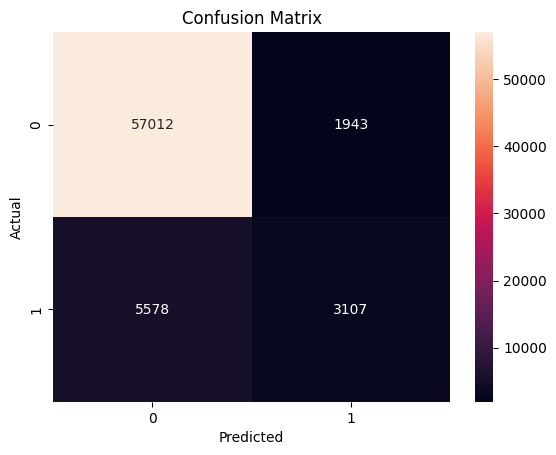

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(matrix, annot = True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()